# Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
pd.set_option('display.max_columns',100)

# Directory Declaration

In [2]:
home_dir = '/Users/somendra/Downloads/bankMarketing'
data_dir = '/Users/somendra/Downloads/bankMarketing/bank-additional'

# Importing Dataset

In [216]:
oneDf = pd.read_csv(data_dir+'/bank-additional-full.csv',sep=';')
twoDf = pd.read_csv(data_dir+'/bank-additional.csv',sep=';')
bankDf = pd.concat((oneDf,twoDf),ignore_index=True)
bankDf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Statistics

In [217]:
bankDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
age               45307 non-null int64
job               45307 non-null object
marital           45307 non-null object
education         45307 non-null object
default           45307 non-null object
housing           45307 non-null object
loan              45307 non-null object
contact           45307 non-null object
month             45307 non-null object
day_of_week       45307 non-null object
duration          45307 non-null int64
campaign          45307 non-null int64
pdays             45307 non-null int64
previous          45307 non-null int64
poutcome          45307 non-null object
emp.var.rate      45307 non-null float64
cons.price.idx    45307 non-null float64
cons.conf.idx     45307 non-null float64
euribor3m         45307 non-null float64
nr.employed       45307 non-null float64
y                 45307 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [218]:
bankDf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
mean,40.032203,258.148917,2.564835,962.288785,0.174543,0.082166,93.576032,-40.502282,3.621297,5166.985525
std,10.411407,258.864200,2.752261,187.370863,0.499364,1.570231,0.578881,4.625101,1.734350,72.380791
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


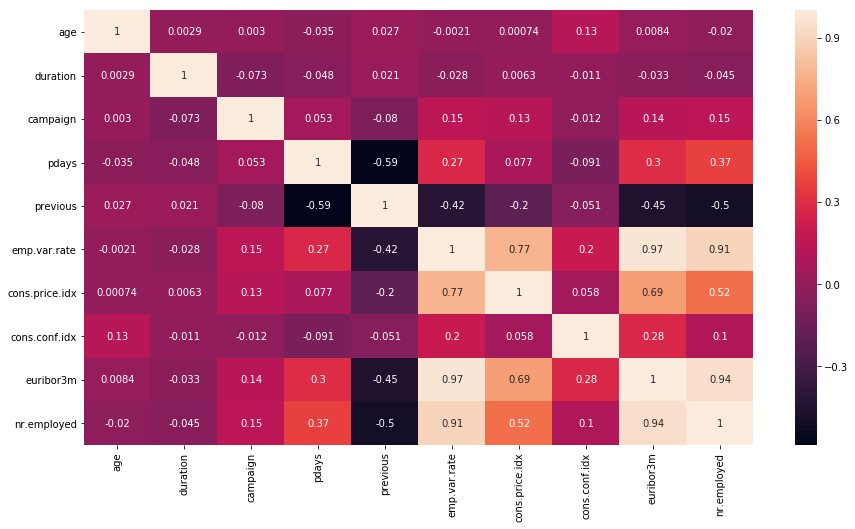

In [219]:
# correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bankDf.corr(),annot=True)

**As it can be seen from the correlation heatmap that following fields are highly correlated:<br>
1) emp.var.rate & euribor3m<br>
2) emp.var.rate & nr.employed<br>
3) euribor3m & nr.employed**

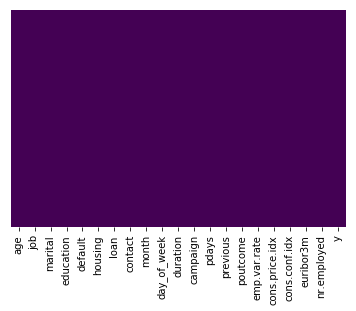

In [220]:
# heatmap for checking null values
sns.heatmap(bankDf.isnull(), cmap="viridis",cbar=False, yticklabels=False)

**As it can be seen from the heatmap that the dataset has no null values. The dataset description suggests that the null values have been replaced with 'unknown' which can be used as class label or imputed.**

# Imputing unknown values

In [221]:
# columns with 'unknown' values
unknownColumns = []
for column in bankDf.columns:
    if 'unknown' in bankDf[column].values:
        unknownColumns.append(column)
unknownColumns

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [222]:
for column in unknownColumns:
    print(column+"| value counts: ")
    print(bankDf[column].value_counts())
    print("#######################")
    print('\n')

job| value counts: 
admin.           11434
blue-collar      10138
technician        7434
services          4362
management        3248
retired           1886
entrepreneur      1604
self-employed     1580
housemaid         1170
unemployed        1125
student            957
unknown            369
Name: job, dtype: int64
#######################


marital| value counts: 
married     27437
single      12721
divorced     5058
unknown        91
Name: marital, dtype: int64
#######################


education| value counts: 
university.degree      13432
high.school            10436
basic.9y                6619
professional.course     5778
basic.4y                4605
basic.6y                2520
unknown                 1898
illiterate                19
Name: education, dtype: int64
#######################


default| value counts: 
no         35903
unknown     9400
yes            4
Name: default, dtype: int64
#######################


housing| value counts: 
yes        23751
no         20461
unk

### Imputing 'education' values

**As we know job and education are correlated to some extent, although it is not totally correct but still, we can safely impute some values by taking the mode values of education corresponding to each job.**

In [223]:
jobList = bankDf['job'].unique()
educationList = bankDf['education'].unique()
imputeEducationDict = {}
for job in jobList:
    if job !='unknown':
        print("education value counts corresponding to "+job+" : ")
        print("\n")
        educationSeries = bankDf[bankDf['job']==job]['education'].value_counts()
        print(educationSeries)
        print("#############################")
        print("\n")
    
    
        for k,v in educationSeries.iteritems():
            if v == educationSeries.max():
                imputeEducationDict[job] = k
    else:
        pass
    

education value counts corresponding to housemaid : 


basic.4y               526
high.school            185
university.degree      161
basic.9y                99
basic.6y                86
professional.course     67
unknown                 45
illiterate               1
Name: education, dtype: int64
#############################


education value counts corresponding to services : 


high.school            2936
basic.9y                444
professional.course     243
basic.6y                238
university.degree       191
unknown                 162
basic.4y                148
Name: education, dtype: int64
#############################


education value counts corresponding to admin. : 


university.degree      6320
high.school            3640
basic.9y                543
professional.course     401
unknown                 273
basic.6y                171
basic.4y                 85
illiterate                1
Name: education, dtype: int64
#############################


education value c

In [224]:
imputeEducationDict

{'housemaid': 'basic.4y',
 'services': 'high.school',
 'admin.': 'university.degree',
 'blue-collar': 'basic.9y',
 'technician': 'professional.course',
 'retired': 'basic.4y',
 'management': 'university.degree',
 'unemployed': 'university.degree',
 'self-employed': 'university.degree',
 'entrepreneur': 'university.degree',
 'student': 'high.school'}

In [225]:
def imputeEducation(row):
    try:
        if row[1]=='unknown':
            return [row[0],imputeEducationDict[row[0]]]
        else:
            return row
    except KeyError:
        return row
        
    

In [226]:
bankDf[['job','education']] = bankDf[['job','education']].apply(imputeEducation, axis=1)

In [227]:
bankDf['education'].value_counts()

university.degree      13962
high.school            10785
basic.9y                7115
professional.course     6009
basic.4y                4753
basic.6y                2520
unknown                  144
illiterate                19
Name: education, dtype: int64

### Imputing 'job' values

**We can impute 'job' field with 'unknown' values similar to 'education' field**

In [228]:
jobList = bankDf['job'].unique()
educationList = bankDf['education'].unique()
imputeJobDict = {}
for education in educationList:
    if education !='unknown':
        print("job value counts corresponding to "+education+" : ")
        print("\n")
        jobSeries = bankDf[bankDf['education']==education]['job'].value_counts()
        print(jobSeries)
        print("#############################")
        print("\n")
    
    
        for k,v in jobSeries.iteritems():
            if v == jobSeries.max():
                imputeJobDict[education] = k
    else:
        pass
    

job value counts corresponding to basic.4y : 


blue-collar      2540
retired           759
housemaid         571
entrepreneur      155
services          148
unemployed        125
management        113
self-employed     104
admin.             85
technician         65
unknown            60
student            28
Name: job, dtype: int64
#############################


job value counts corresponding to high.school : 


admin.           3640
services         3098
technician        968
blue-collar       967
student           579
management        339
retired           300
unemployed        282
entrepreneur      251
housemaid         185
self-employed     133
unknown            43
Name: job, dtype: int64
#############################


job value counts corresponding to basic.6y : 


blue-collar      1578
services          238
admin.            171
technician         97
management         93
housemaid          86
retired            81
entrepreneur       76
unemployed         37
self-employed  

In [229]:
imputeJobDict

{'basic.4y': 'blue-collar',
 'high.school': 'admin.',
 'basic.6y': 'blue-collar',
 'basic.9y': 'blue-collar',
 'professional.course': 'technician',
 'university.degree': 'admin.',
 'illiterate': 'blue-collar'}

In [230]:
def imputeJob(row):
    try:
        if row[1]=='unknown':
            return [row[0],imputeJobDict[row[0]]]
        else:
            return row
    except KeyError:
        return row
        
    

In [231]:
bankDf[['education','job']] = bankDf[['education','job']].apply(imputeJob, axis=1)

In [232]:
bankDf['job'].value_counts()

admin.           11525
blue-collar      10258
technician        7448
services          4362
management        3248
retired           1886
entrepreneur      1604
self-employed     1580
housemaid         1170
unemployed        1125
student            957
unknown            144
Name: job, dtype: int64

### Imputing 'default values

**Since we have only 4 values of 'yes' in the default field we can safely drop these values and only consider two values: "no" and "unknown"**

In [233]:
bankDf = bankDf[bankDf['default']!='yes']

**We are imputing only the above three fields with 'unknown' values as it is difficult to predict about the following fields having 'unknown' values: 'marital','housing','loan'**

# Data Analysis

In [234]:
bankDf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


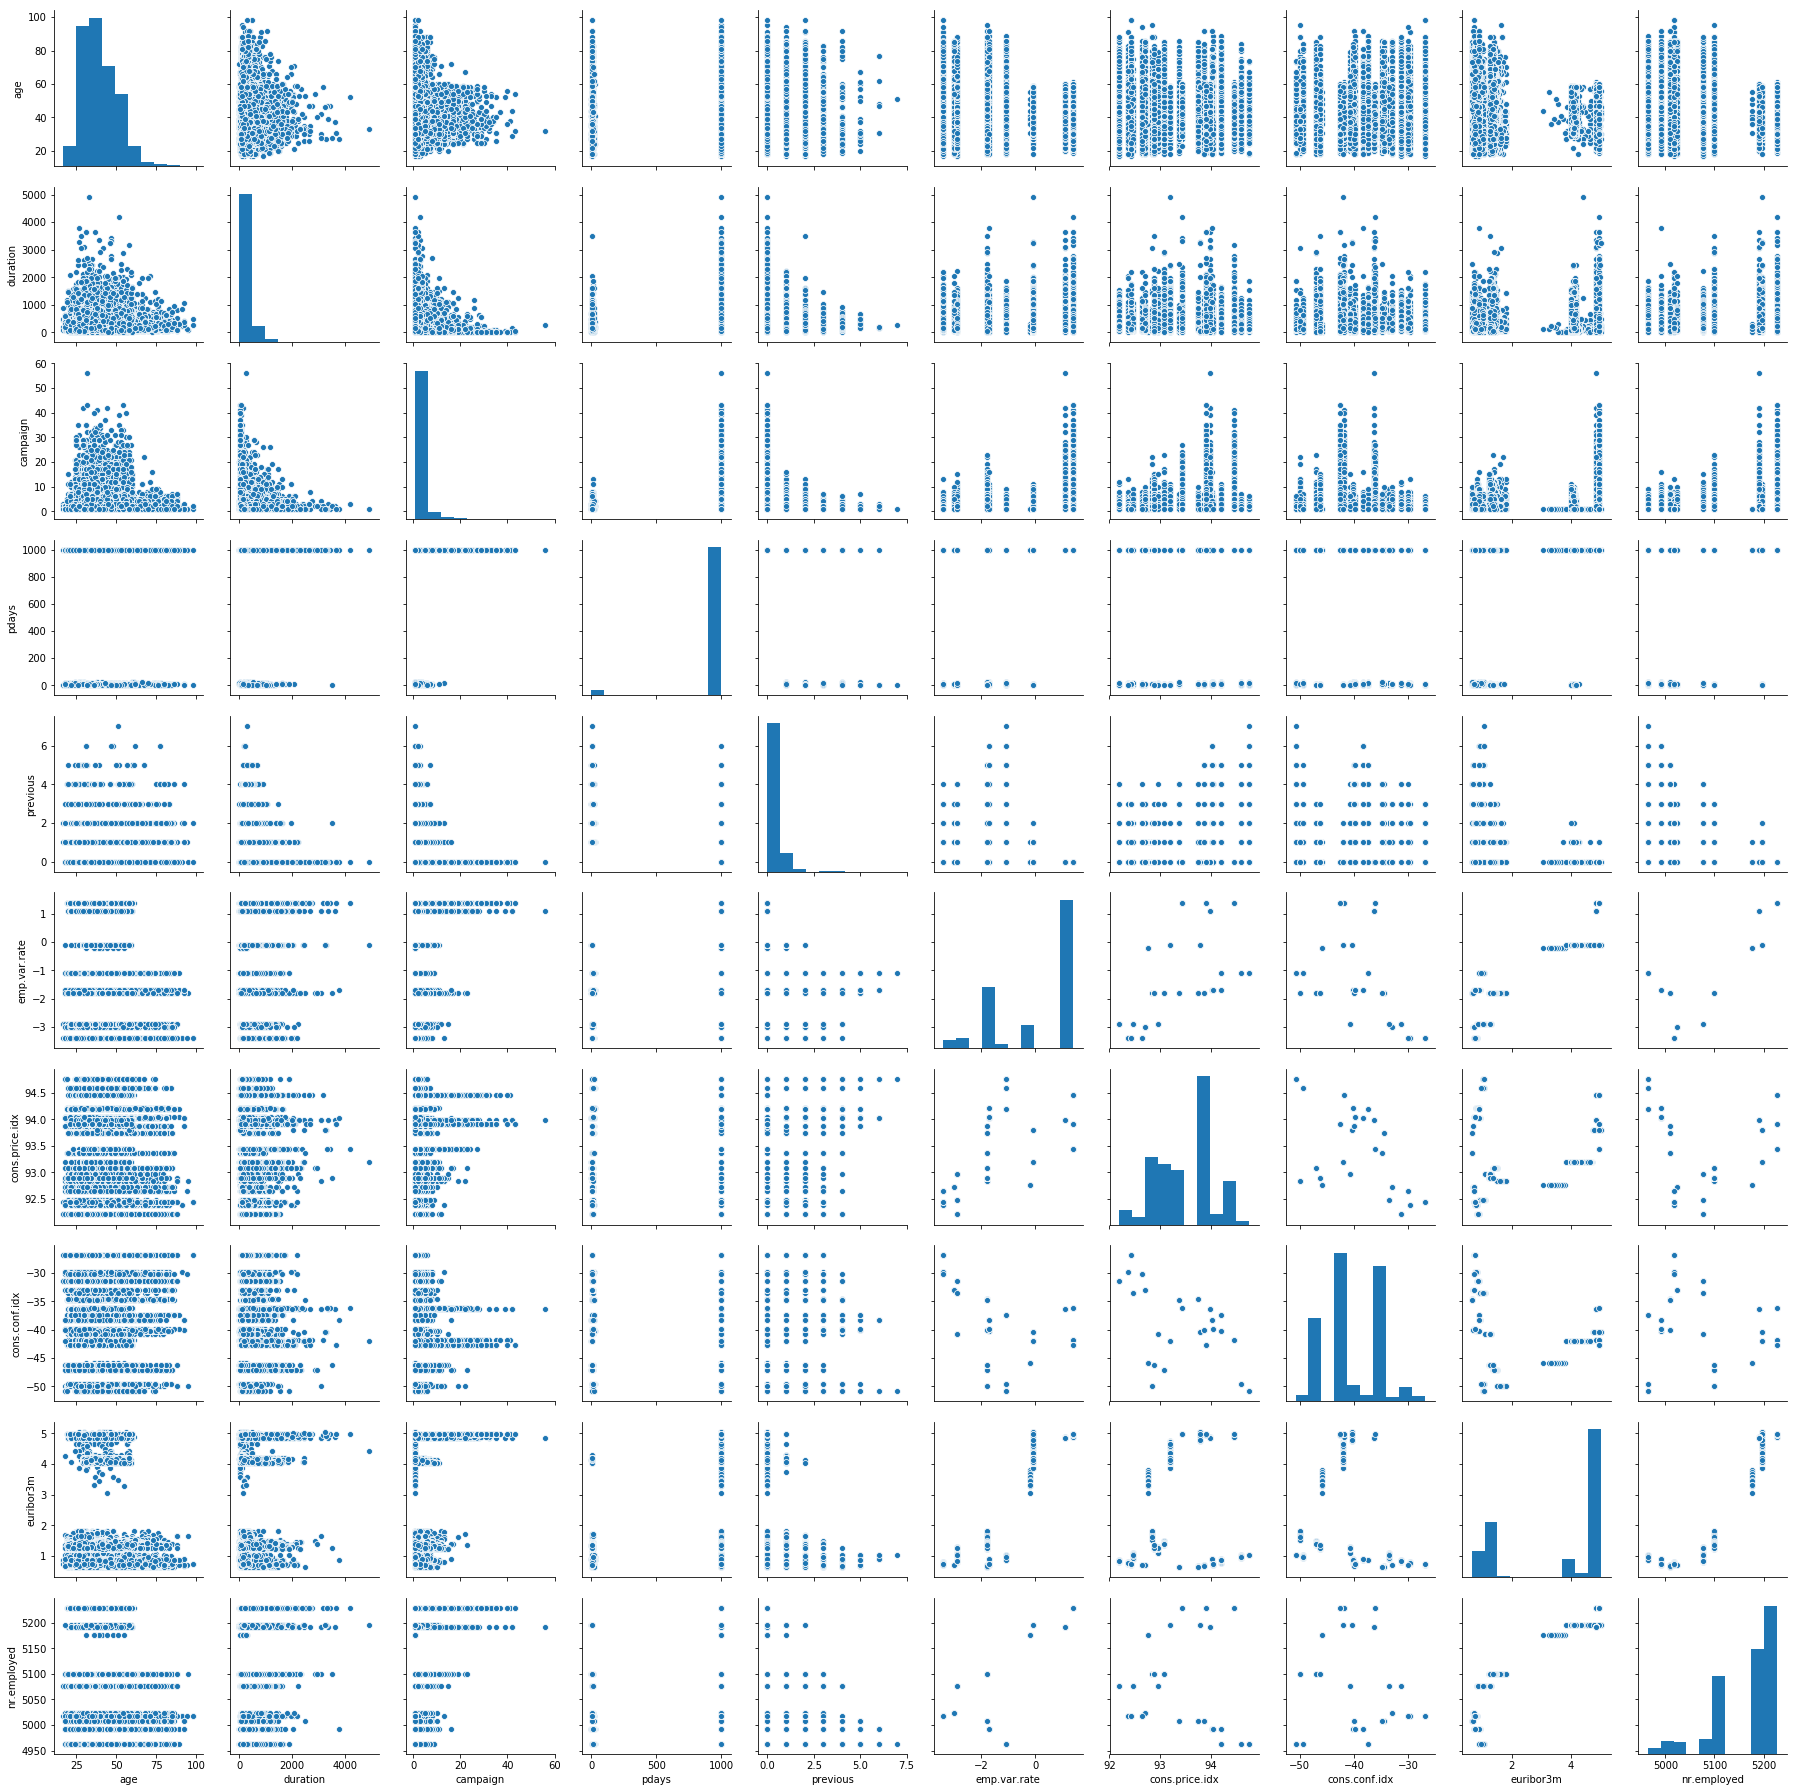

In [235]:
sns.pairplot(bankDf)

In [236]:
bankDf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45303.000000,45303.000000,45303.000000,45303.000000,45303.000000,45303.000000,45303.000000,45303.000000,45303.000000,45303.000000
mean,40.032250,258.162417,2.564929,962.285544,0.174514,0.082116,93.576054,-40.502410,3.621214,5166.981555
std,10.411559,258.871539,2.752360,187.378818,0.499355,1.570276,0.578901,4.625202,1.734401,72.382594
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**It can be seen from the above dataframe that the fields ['duration','campaign'] have very high 'max' values as compared to their 'mean' values, this behaviour suggests presence of outlier values in data**

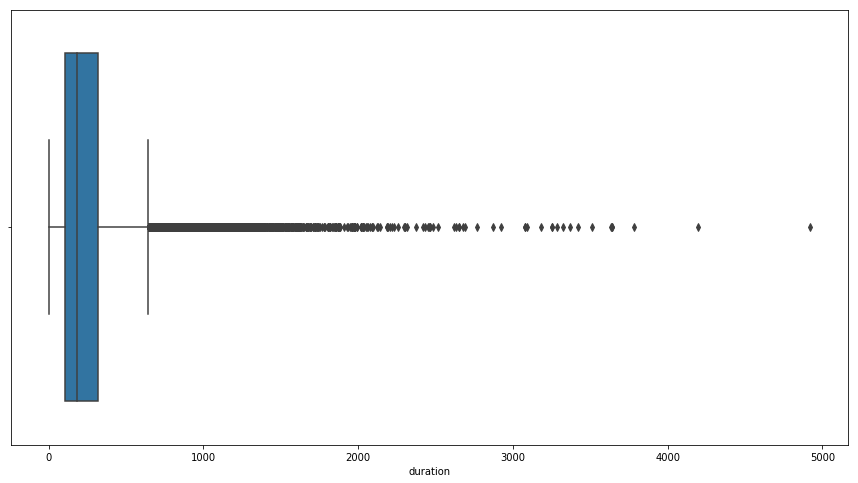

In [237]:
plt.figure(figsize=(15,8))
sns.boxplot(bankDf['duration'])

In [238]:
len(bankDf[bankDf['duration']>2500])

27

In [239]:
len(bankDf)

45303

**As we can see there are only 27 'duration' values greater than 2500 so it seems safe to drop these values**

In [240]:
bankDf = bankDf[bankDf['duration']<2500]

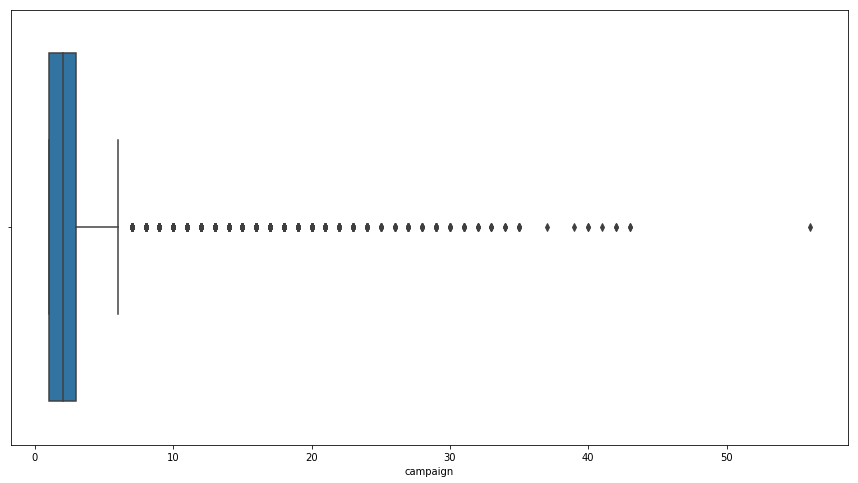

In [241]:
plt.figure(figsize=(15,8))
sns.boxplot(bankDf['campaign'])

In [242]:
len(bankDf[bankDf['campaign']>35])

10

**As we can see there are only 10 'campaign' values greater than 35 so it seems safe to drop these values**

In [243]:
bankDf = bankDf[bankDf['campaign']<35]

In [244]:
bankDf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Model Building
Creation of machine learning model for predictive analysis. I have considered the following classifiers:<br>
1) Naive Bayes Classifier<br>
2) Logistic Regression<br>
3) Random Forest Classifier<br>
4) XGBoost Gradient Classifier<br>
5) Support Vector Machines<br>

In [245]:
def train_model(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(predictions,y_test)

In [246]:
bankDf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [247]:
bankDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45260 entries, 0 to 45306
Data columns (total 21 columns):
age               45260 non-null int64
job               45260 non-null object
marital           45260 non-null object
education         45260 non-null object
default           45260 non-null object
housing           45260 non-null object
loan              45260 non-null object
contact           45260 non-null object
month             45260 non-null object
day_of_week       45260 non-null object
duration          45260 non-null int64
campaign          45260 non-null int64
pdays             45260 non-null int64
previous          45260 non-null int64
poutcome          45260 non-null object
emp.var.rate      45260 non-null float64
cons.price.idx    45260 non-null float64
cons.conf.idx     45260 non-null float64
euribor3m         45260 non-null float64
nr.employed       45260 non-null float64
y                 45260 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

## Label Encoding

In [248]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()

objectColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y']

objectDf = bankDf[objectColumns]

objectDf = objectDf.apply(lbl_enc.fit_transform)
bankDf[objectColumns] = objectDf
bankDf.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,2,1,0,0,1,6,1,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Train_Test_Split

In [249]:
from sklearn.model_selection import train_test_split

def split_data(X_feature,y_feature):
    X = X_feature
    y = y_feature
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=94)
    return X_train,X_test,y_train,y_test

## ML Models

In [250]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [251]:
def train_model(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(predictions,y_test)

In [252]:
# Classifier function dictionary
classifier_dict = {'NaiveBayes':GaussianNB(),'LogisticRegression':LogisticRegression(),'RandomForest':RandomForestClassifier(),
                  'SVM':svm.LinearSVC(),'xgb':XGBClassifier(max_depth=6,learning_rate=0.15)}

In [253]:
# Dictionary for storing accuracy 
Accuracy = {}

In [254]:
# classifier function
def classifier(model):
    Classifier = classifier_dict[model]
    
    X = bankDf.iloc[:,:-1]
    y = bankDf['y']
    
    # train_test_split function being called for splitting data
    X_train,X_test,y_train,y_test = split_data(X,y)
    
    accuracy = train_model(Classifier,X_train,X_test,y_train,y_test)
    Accuracy[model] = accuracy
    print(model," accuracy:", accuracy)
    

In [255]:
nb = classifier('NaiveBayes')

NaiveBayes  accuracy: 0.8470172337604949


In [256]:
lr = classifier('LogisticRegression')

LogisticRegression  accuracy: 0.9054352629253204


In [262]:
rf = classifier('RandomForest')

RandomForest  accuracy: 0.9188687582854618


In [258]:
svm = classifier('SVM')

SVM  accuracy: 0.8951833848873177


In [263]:
xgb = classifier('xgb')

xgb  accuracy: 0.9182501104728237


In [264]:
Accuracy

{'NaiveBayes': 0.8470172337604949,
 'LogisticRegression': 0.9054352629253204,
 'RandomForest': 0.9188687582854618,
 'SVM': 0.8951833848873177,
 'xgb': 0.9182501104728237}

In [265]:
accuracyDf = pd.DataFrame([acc for acc in Accuracy.values()],columns=['Accuracy'],index = Accuracy.keys())
accuracyDf

,Accuracy
NaiveBayes,0.847017
LogisticRegression,0.905435
RandomForest,0.918869
SVM,0.895183
xgb,0.918250


**Therefore the Random Forest classifier came up with highest accuracy**

## K-Fold cross validation of Random Forest

In [266]:
X = bankDf.iloc[:,:-1]
y = bankDf['y']
X_train,X_test,y_train,y_test = split_data(X,y)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=10,shuffle=True)
acc = np.array([])
for train_idx,test_idx in kfold.split(X_train,y_train):
    X_train_cv,y_train_cv = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_test_cv, y_test_cv = X_train.iloc[test_idx], y_train.iloc[test_idx]
    
    clf = classifier_dict['RandomForest']
    clf.fit(X_train_cv, y_train_cv)
    predictions = clf.predict(X_test_cv)
    
    acc = np.append(acc, accuracy_score(y_test_cv,predictions))
print(acc)
print("Accuracy score: %0.2f +/- %0.2f" %(acc.mean(),acc.std()))

[0.91929308 0.9281296  0.91575847 0.92400589 0.91782032 0.91809075
 0.92516205 0.92457278 0.91602829 0.91750147]
Accuracy score: 0.92 +/- 0.00


## Stratified K-Fold cross validation of Random Forest

In [267]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True)
acc = np.array([])

X = bankDf.iloc[:,:-1]
y = bankDf['y']
X_train,X_test,y_train,y_test = split_data(X,y)

for train_idx,test_idx in skf.split(X_train,y_train):
    X_train_cv,y_train_cv = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_test_cv, y_test_cv = X_train.iloc[test_idx], y_train.iloc[test_idx]
    
    clf = classifier_dict['RandomForest']
    clf.fit(X_train_cv, y_train_cv)
    predictions = clf.predict(X_test_cv)
    
    acc = np.append(acc, accuracy_score(y_test_cv,predictions))
print(acc)
print("Accuracy score: %0.2f +/- %0.2f" %(acc.mean(),acc.std()))

[0.9281296  0.92135493 0.92371134 0.92076583 0.91634757 0.91958763
 0.92044785 0.92722451 0.92692988 0.92219275]
Accuracy score: 0.92 +/- 0.00


**As it can be seen from the cross validation scores of both the methods that there are high chances that model is free of bias and variance**

## Result:

**With the supervised machine learning model now the marketing team can predict with almost 92% accuracy whether the prospect will buy the product or not. This will hugely maximize the profit as the model will help to identify the potential target prospects**